## Técnica Alternativa usando o COBRAPY

In [10]:
import cobra

import pandas
from time import time
import numpy as np

from cobra.util.solver import linear_reaction_coefficients

import cobra.test
from cobra.flux_analysis import (single_gene_deletion, single_reaction_deletion, double_gene_deletion, double_reaction_deletion)

cobramo = cobra.io.read_sbml_model('../models/iML1515.xml')

cobramo.objective = {cobramo.reactions.BIOMASS_Ec_iML1515_core_75p37M: 1.0}
cobramo.objective

cobramo.reactions.get_by_id("EX_o2_e").upper_bound = 1000
cobramo.reactions.get_by_id("EX_o2_e").lower_bound = 0
cobramo.reactions.get_by_id("EX_glc__D_e").upper_bound = 1000
cobramo.reactions.get_by_id("EX_glc__D_e").lower_bound = -15

solution = cobramo.optimize()
print(solution)

<Solution 0.266 at 0x7f3c60260190>


In [ ]:
cobramo.objective = {cobramo.reactions.EX_lac__L_e: 1.0, cobramo.reactions.EX_lac__D_e: 1.0}

cobramo.reactions.get_by_id("BIOMASS_Ec_iML1515_core_75p37M").lower_bound = 0.266
cobramo.reactions.get_by_id("BIOMASS_Ec_iML1515_core_75p37M").upper_bound = 1000

pandas.set_option('display.max_rows', 2000)

deletion_results = single_gene_deletion(cobramo)
deletion_results_sorted = deletion_results.sort_values(by=['growth'], ascending=False)
print(deletion_results_sorted)

In [11]:
## Modelo Alternativo

          ids    growth      status
1482  {b3619}  0.045195     optimal
1463  {b3875}  0.045195     optimal
1459  {b0861}  0.045195     optimal
1457  {b2366}  0.045195     optimal
1456  {b2490}  0.045195     optimal
1455  {b1896}  0.045195     optimal
1454  {b4291}  0.045195     optimal
1453  {b2813}  0.045195     optimal
1465  {b0356}  0.045195     optimal
1483  {b1430}  0.045195     optimal
1484  {b2724}  0.045195     optimal
1466  {b2155}  0.045195     optimal
1467  {b0514}  0.045195     optimal
1468  {b2498}  0.045195     optimal
1469  {b0875}  0.045195     optimal
1470  {b3909}  0.045195     optimal
1461  {b0628}  0.045195     optimal
1471  {b2134}  0.045195     optimal
1472  {b3656}  0.045195     optimal
1473  {b1514}  0.045195     optimal
1475  {b1619}  0.045195     optimal
1476  {b1917}  0.045195     optimal
1477  {b3727}  0.045195     optimal
1478  {b1479}  0.045195     optimal
1479  {b0517}  0.045195     optimal
1480  {b3623}  0.045195     optimal
1493  {b0810}  0.045195     

## Modelo Alternativo

Running NSGAII


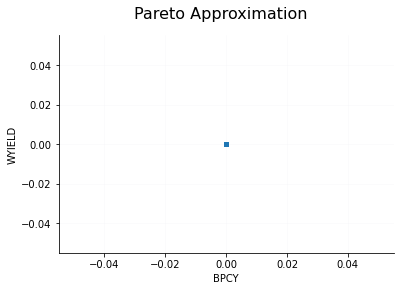

Gen    Eval|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
   0    100|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   1    200|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   2    300|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   3    400|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   4    500|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   5    600|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   6    700|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   7    800|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000

In [2]:
from mewpy.optimization.evaluation import BPCY, WYIELD
from mewpy.problems import GKOProblem
from mewpy.optimization import EA
from mewpy.simulation import SimulationMethod
from reframed.io.sbml import load_cbmodel

reframed_model = load_cbmodel('../models/iMM904SL_v6.xml', flavor='cobra')
envcond = {'R_EX_glc_e_': (-15, 999999.0), 'R_EX_o2_e_': (0, 999999.0)}

PRODUCT_ID = 'R_EX_lac_D_e_'
BIOMASS_ID = 'R_biomass_SC5_notrace'
GLUC_ID = 'R_EX_glc_e_'
reframed_model.set_objective({BIOMASS_ID:1})

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method = SimulationMethod.lMOMA)
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID)

problem = GKOProblem(reframed_model, fevaluation=[evaluator_1, evaluator_2], envcond=envcond, candidate_min_size=1, candidate_max_size=1)
ea = EA(problem, max_generations= 10, visualizer=True, mp=True)
final_pop = ea.run()
print(final_pop)

Running NSGAII


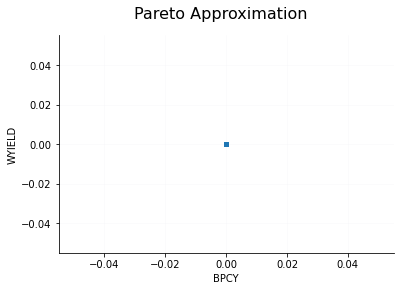

Gen    Eval|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
   0    100|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   1    200|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   2    300|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   3    400|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   4    500|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   5    600|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
[0.0, 0.0];{'G_YLR070C': 0.0625, 'G_YDR342C': 16, 'G_YDR403W': 8, 'G_YGR138C': 0.0625}


In [3]:
from mewpy.problems import GOUProblem
from mewpy.optimization import EA


problem = GOUProblem(reframed_model, fevaluation=[evaluator_1, evaluator_2], envcond=envcond, candidate_max_size=5)
ea = EA(problem, max_generations= 5, visualizer=True, mp=True)
final_pop = ea.run()

print(final_pop[0])

## Consumo de oxigénio

/usr/local/lib/python3.7/site-packages/reframed/io/sbml.py:510: UserWarning:

Gene association for reaction R_PFL is not DNF

/usr/local/lib/python3.7/site-packages/reframed/io/sbml.py:510: UserWarning:

Gene association for reaction R_RNDR1 is not DNF

/usr/local/lib/python3.7/site-packages/reframed/io/sbml.py:510: UserWarning:

Gene association for reaction R_RNDR3 is not DNF

/usr/local/lib/python3.7/site-packages/reframed/io/sbml.py:510: UserWarning:

Gene association for reaction R_RNDR4 is not DNF

/usr/local/lib/python3.7/site-packages/reframed/io/sbml.py:510: UserWarning:

Gene association for reaction R_CITL is not DNF

/usr/local/lib/python3.7/site-packages/reframed/io/sbml.py:510: UserWarning:

Gene association for reaction R_NO3R1bpp is not DNF

/usr/local/lib/python3.7/site-packages/reframed/io/sbml.py:510: UserWarning:

Gene association for reaction R_NO3R2bpp is not DNF

/usr/local/lib/python3.7/site-packages/reframed/io/sbml.py:510: UserWarning:

Gene association for re

Running NSGAII


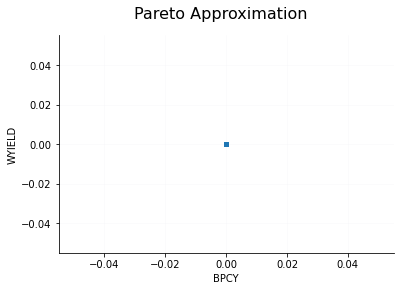

Gen    Eval|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
   0    100|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   1    200|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   2    300|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   3    400|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   4    500|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   5    600|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
[[0.0, 0.0];{'G_b3137': 0}, [0.0, 0.0];{'G_b3517': 0}, [0.0, 0.0];{'G_b2418': 0}, [0.0, 0.0];{'G_b2801': 0}, [0.0, 0.0];{'G_b1521': 0}, [0.0, 0.0];{'G_b0334': 0}, [0.0, 0.0];{'G_b4196': 0}, [0.0,

In [1]:
from mewpy.optimization.evaluation import BPCY, WYIELD
from mewpy.problems import GKOProblem
from mewpy.optimization import EA
from mewpy.simulation import SimulationMethod
from reframed.io.sbml import load_cbmodel
reframed_model = load_cbmodel('../models/iML1515.xml')

envcond = {'R_EX_glc__D_e': (-15, 999999.0)}

PRODUCT_ID = 'R_EX_lac__D_e'
BIOMASS_ID = 'R_Biomass_Ec_iML1515_core_75p37M'

evaluator_1 = BPCY(BIOMASS_ID, PRODUCT_ID, method = SimulationMethod.lMOMA)
evaluator_2 = WYIELD(BIOMASS_ID, PRODUCT_ID)

problem = GKOProblem(reframed_model, fevaluation=[evaluator_1, evaluator_2], envcond=envcond, candidate_min_size=1, candidate_max_size=1)
ea = EA(problem, max_generations=5, visualizer=True, mp=True)
final_pop = ea.run()
print(final_pop)
print(len)

In [ ]:
from mewpy.problems import GOUProblem
from mewpy.optimization import EA


problem = GOUProblem(reframed_model, fevaluation=[evaluator_1, evaluator_2], envcond=envcond, candidate_max_size=5)
ea = EA(problem, max_generations= 10, visualizer=True, mp=True)
final_pop = ea.run()

print(final_pop[0])

Running NSGAII


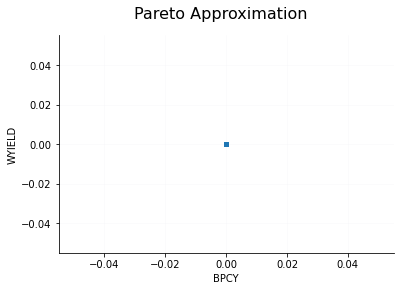

Gen    Eval|     Worst      Best    Median   Average   Std Dev|     Worst      Best    Median   Average   Std Dev|
   0    100|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   1    200|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   2    300|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   3    400|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   4    500|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   5    600|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   6    700|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000000  0.000000  0.000000  0.000000|
   7    800|  0.000000  0.000000  0.000000  0.000000  0.000000|  0.000000  0.000